<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Индивидуальный проект по анализу данных </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Построение признаков
 - Отбор признаков
 - Построение модели
 - Кросс-валидация, подбор параметров
 - Кривые валидации и обучения
 - Прогноз для тестовой (или отложенной) выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline
#пока не все импортировано, будет добавлено по мере необходимости

Populating the interactive namespace from numpy and matplotlib


Данные по загрязнению воздуха 

In [2]:
#Выбраны данные по уровню загрязнения воздуха в одном из месте Италии.
# Чтение файла из набора http://archive.ics.uci.edu/ml/datasets/Air+Quality 
#Сразу меняем разделитель и признак десятичной точки
df = pd.read_csv('../../data/AirQualityUCI.csv',sep=';',decimal=",",parse_dates=True)

###  Часть 1. Описание набора данных и признаков

In [3]:
# Проверка, что файл прочитался нормально
#Также есть проблема с полем Timeб отложим решение проблемы на потом.

df.head().T

,0,1,2,3,4
Date,10/03/2004,10/03/2004,10/03/2004,10/03/2004,10/03/2004
Time,18.00.00,19.00.00,20.00.00,21.00.00,22.00.00
CO(GT),2.6,2,2.2,2.2,1.6
PT08.S1(CO),1360,1292,1402,1376,1272
NMHC(GT),150,112,88,80,51
C6H6(GT),11.9,9.4,9,9.2,6.5
PT08.S2(NMHC),1046,955,939,948,836
NOx(GT),166,103,131,172,131
PT08.S3(NOx),1056,1174,1140,1092,1205
NO2(GT),113,92,114,122,116


Информация об атрибутах:
0 Date (DD/MM/YYYY) -Дата
1 Time (HH.MM.SS) Время
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) -Средняя концентрация CO
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) Данные сенсора по различным вредным веществам
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) Данные сенсора по различным вредным веществам
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) Данные сенсора по различным вредным веществам
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) Данные сенсора по различным вредным веществам
7 True hourly averaged NOx concentration in ppb (reference analyzer) Данные сенсора по различным вредным веществам
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) Данные сенсора по различным вредным веществам
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) Данные сенсора по различным вредным веществам
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) Данные сенсора по различным вредным веществам
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) Данные сенсора по различным вредным веществам
12 Temperature in Â°C Температура
13 Relative Humidity (%) Относительная влажность
14 AH Absolute Humidity Абсолютная влажность

Расписывать более детально нет смысла так как они показваюь соста выхлопных газов, основной вред от оксида углерода всем остальным с точки зрения обвателя, для построени эко окна можно не принимать во внимание. 

In [4]:
#Проведем первичную обраюотку данных
#Удалим не используемые столбцы с данными Unnamed: 16,Unnamed: 15
df.drop(df.columns[[15,16]], axis=1, inplace=True)
#Создадим новую колонку DayOfWeeks, так как мы для нашей гипотезы потребуеться день недели, но об этом позже
df["DayOfWeeks"]=pd.to_datetime(df['Date']).dt.dayofweek


Цель нашего иследования, предсказать экологическон окно, в зависмости от временных интервалов(время,день недели, возможно месяцб и погодных условий температуры и влажности.

###  Часть 2. Первичный анализ признаков

In [5]:
#Просмотр типов данных
df.info()
# Все данные заполнены, пропусков нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
DayOfWeeks       9357 non-null float64
dtypes: float64(14), object(2)
memory usage: 1.2+ MB


In [6]:
#Формально пропусков нет, но это не так так как в датасете пропуски заполнены заначеним '-200',по этому заменим их на NaN
#df.drop(df.columns[[15,16]], axis=1, inplace=True)
df=df.replace(-200,pd.np.nan)
#Тперь проведем замену Nan на интерполиованные значения, так как датасет получен с датчиков то на мой взгляд это самое
#простое решение
df=df.interpolate()
#Удалим строки с оставшимся NaN, их мало в основно с поле Date
df=df.dropna()
#Приведем столбец Time к целоцисленому интервалу [0,24]
df['Time']=df['Time'].str.replace('.00.00','').astype(int)
#df[df.[]isnull()=True]
#df.info()
#df=df.replace(-200,pd.np.nan)
#for i1 in df.columns:
         # print(i1,df[df[i1].isnull()==True])


In [7]:
#Посмотрим на статистику нашего датафрейма
df.describe()


,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DayOfWeeks
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.130603,1103.059741,269.834349,10.179155,942.142620,241.922197,832.758897,109.632094,1453.298814,1032.544298,18.233408,49.191386,1.019621,3.002244
std,6.923182,1.431736,218.196346,74.251999,7.503812,267.866611,204.315075,255.709833,46.462311,343.206131,404.447613,8.781791,17.194506,0.402203,2.008026
min,0.000000,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000
25%,5.000000,1.100000,938.000000,275.000000,4.500000,736.000000,96.000000,654.000000,76.000000,1227.000000,733.000000,11.700000,35.800000,0.732300,1.000000
50%,11.000000,1.800000,1067.000000,275.000000,8.300000,910.012987,180.000000,804.000000,104.917526,1460.000000,970.000000,17.600000,49.600000,0.989500,3.000000
75%,18.000000,2.900000,1239.000000,275.000000,14.100000,1119.000000,326.000000,968.000000,136.314685,1668.000000,1293.000000,24.300000,62.300000,1.306700,5.000000
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,6.000000


###  Часть 3. Первичный визуальный анализ признаков

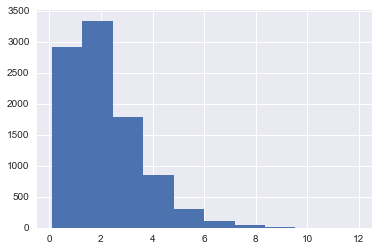

In [8]:
df['CO(GT)'].hist()

In [9]:
predictors = list(set(df.columns) - set('Date'))
corr = df[predictors].corr()

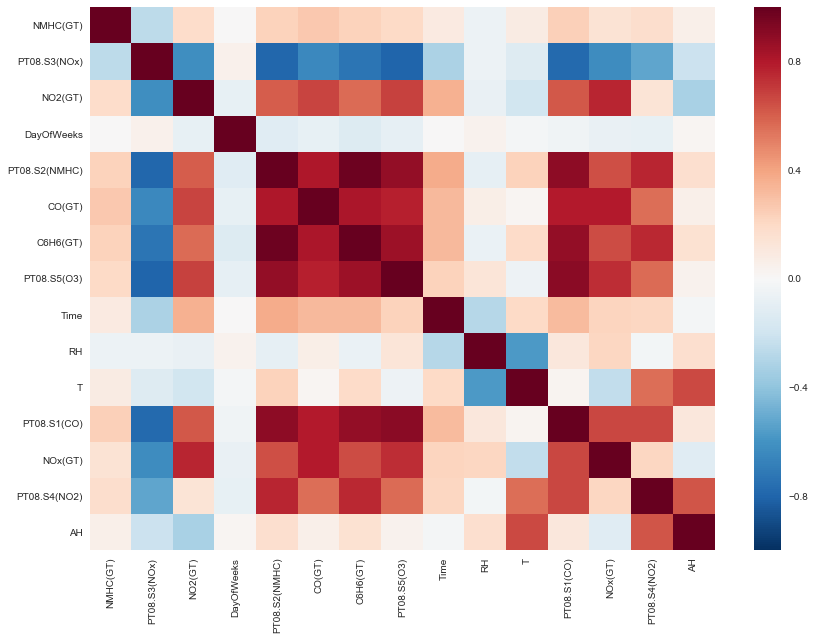

In [10]:
figsize(14, 10)
sns.heatmap(corr)
#Посмотрим на коррелированные признаки

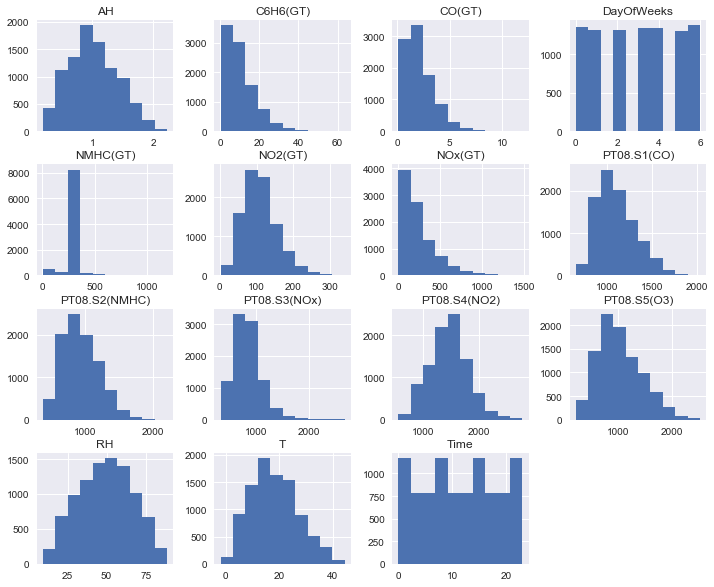

In [11]:
plots = df[predictors].hist(figsize=(12,10))

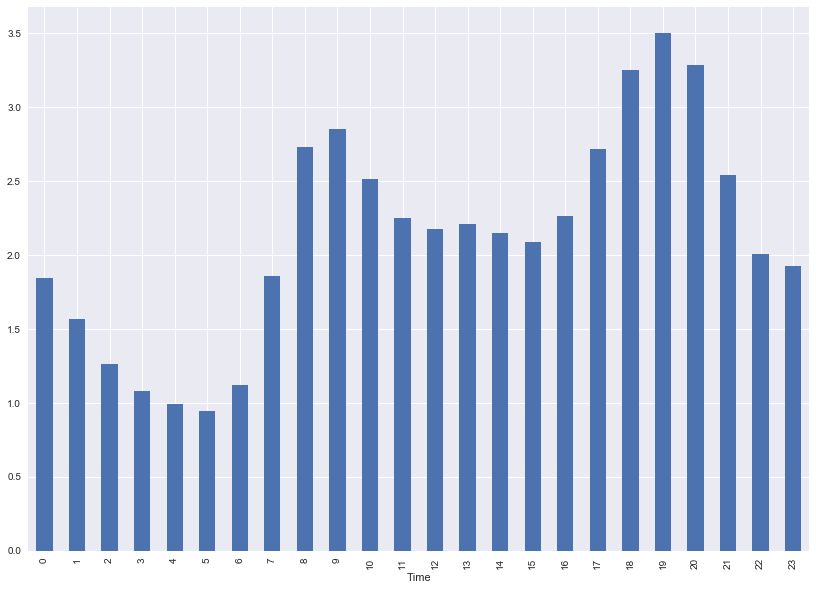

In [12]:
df.groupby('Time')['CO(GT)'].mean().plot(kind='bar')


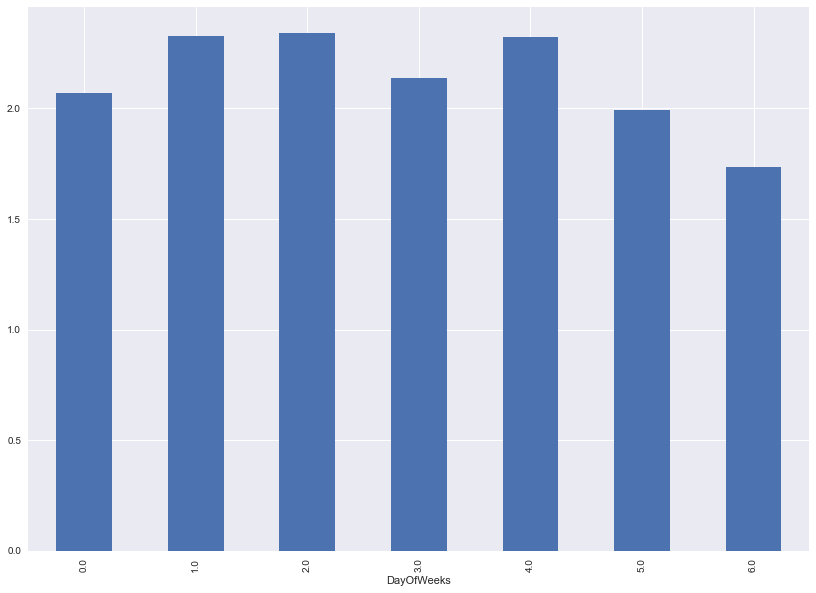

In [13]:
df.groupby('DayOfWeeks')['CO(GT)'].mean().plot(kind='bar')

###  Часть 4. Закономерности, "инсайты", особенности данных

In [14]:
#Из heatmap выбарем наиболее коррелированные признаки с данными по загрязнению CO , часть признаков будет технического характера
#что вобщем и понятно,это следы выхлопных газов, другая часть признаков временного характера, 
#это связано с временем движения траспорта, к сожалению не потвердлисаь гипотеза о вляинии температуры и влажности.
#После изучения анализа времменых рядов, будеи сделан более полный анализ ситуации

###  Часть 5. Предобработка данных 

In [15]:
#Создадим 2 набора данных, обычные данные и отмасштабированныеб без поля дата
#Удалим также признак Data,целевой признак CO(GT) и данные алтернативного датчика по CO -PT08.S1(CO)
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = df.drop(['Date','CO(GT)','PT08.S1(CO)'], axis=1)
scaler = StandardScaler()
data_scaller = pd.DataFrame(scaler.fit_transform(data))
data_scaller.columns=df.drop(['Date','CO(GT)','PT08.S1(CO)'], axis=1).columns
data_target=df['CO(GT)']
#data.head()
data_scaller.head()

,Time,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DayOfWeeks
0,0.939133,-1.613973,0.229342,0.387741,-0.371614,0.873072,0.072491,0.695541,0.582197,-0.527644,-0.016947,-0.651002,1.492967
1,1.083583,-2.125772,-0.103840,0.048002,-0.679977,1.334557,-0.379513,0.307998,-0.149704,-0.561807,-0.086741,-0.731314,1.492967
2,1.228033,-2.449012,-0.157149,-0.011733,-0.542927,1.201587,0.094015,0.296343,0.102505,-0.721236,0.279675,-0.669899,1.492967
3,1.372483,-2.556759,-0.130495,0.021868,-0.342246,1.013864,0.266206,0.380845,0.421476,-0.823727,0.628642,-0.579144,1.492967
4,1.516933,-2.947342,-0.490331,-0.396273,-0.542927,1.455795,0.137063,0.106942,0.191520,-0.800951,0.605378,-0.573922,1.492967


###  Часть 6. Построение признаков

In [16]:
#Проведем разбиенние данных, на обучающие и тестовые данные, с учетом масшатибированых данных
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data,data_target,random_state=17,test_size=0.3)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data_scaller,data_target,random_state=17,test_size=0.3)

###  Часть 7. Отбор признаков

In [17]:
#сделано в пункте 5

###  Часть 8. Построение модели

In [18]:
#Проведем анализ на линейных моделях
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge,LinearRegression

#Проверим на линейной регресии
model=LinearRegression()
model.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))
#Проверим на масштабированных данных
model_s=LinearRegression()
model_s.fit(X_train_s,y_train_s)
# The coefficients
print('Coefficients: \n', model_s.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_s.score(X_test_s, y_test_s))
#На отмасштабируемых данных, матрица корреляции иммет, тоже отмаштабируеммые коэфициенты
#что вобщем и ожидалось так как модель линейная

Coefficients: 
 [  1.38942013e-02   1.71315170e-03   6.83492908e-02  -1.73529807e-03
   3.79658406e-03   3.27365736e-04   4.53957823e-03   2.09676044e-03
  -4.85049045e-05  -1.39575387e-02  -3.51146906e-03  -2.32049804e-01
   8.87610697e-03]
Mean squared error: 0.36
Variance score: 0.82
Coefficients: 
 [ 0.09618694  0.12719814  0.5128528  -0.46480357  0.77565791  0.08370616
  0.21090803  0.71958258 -0.01961664 -0.12256564 -0.06037475 -0.09332612
  0.0178225 ]
Mean squared error: 0.36
Variance score: 0.82


In [19]:
#Проверим для lasso c коэффициентами по умолчанию
model=Lasso()
model.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))
#Проверим на масштабированных данных
model_s=Lasso()
model_s.fit(X_train_s,y_train_s)
# The coefficients
print('Coefficients: \n', model_s.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_s.score(X_test_s, y_test_s))
#На отмасштабируемых данных, матрица корреляции иммет, тоже отмаштабируеммые коэфициенты
#что вобщем и ожидалось так как модель линейная

Coefficients: 
 [  0.00000000e+00   1.64897330e-03   0.00000000e+00   1.21326254e-03
   3.78744542e-03   8.08456884e-04   4.09801772e-03   1.28280231e-03
   4.06611830e-05  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00]
Mean squared error: 0.38
Variance score: 0.81
Coefficients: 
 [ 0.          0.          0.16302892  0.          0.04447416 -0.          0.
  0.          0.          0.          0.          0.         -0.        ]
Mean squared error: 1.56
Variance score: 0.21


In [20]:
#Проверим для Ridge c коэффициентами по умолчанию
model=Ridge()
model.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))
#Проверим на масштабированных данных
model_s=Ridge()
model_s.fit(X_train_s,y_train_s)
# The coefficients
print('Coefficients: \n', model_s.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_s.score(X_test_s, y_test_s))
#На отмасштабируемых данных, матрица корреляции иммет, тоже отмаштабируеммые коэфициенты
#что вобщем и ожидалось так как модель линейная хотя хвост квадратичный но всилу малого параметра не играет роли

Coefficients: 
 [  1.38908362e-02   1.71307274e-03   6.83094105e-02  -1.73259572e-03
   3.79615867e-03   3.28243751e-04   4.54189286e-03   2.09586880e-03
  -4.85951858e-05  -1.40522078e-02  -3.54399003e-03  -2.29768477e-01
   8.87822992e-03]
Mean squared error: 0.36
Variance score: 0.82
Coefficients: 
 [ 0.0959017   0.12727014  0.50685565 -0.45501299  0.77495056  0.08524397
  0.21083309  0.71702457 -0.01981385 -0.12268905 -0.05999942 -0.09223726
  0.01781674]
Mean squared error: 0.36
Variance score: 0.82


###  Часть 9. Кросс-валидация, подбор параметров

In [21]:
#Подберем параметрв lasso
n_alphas = 200
alphas = np.linspace(-10, 10, n_alphas)
model = LassoCV(alphas=alphas, 
                   cv=3, random_state=42)
model.fit(X_train,y_train)
print (model.alpha_)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))
#Коффициет имеет малое заначение 0.0502512562814б модель близка к линейной

0.0502512562814
Coefficients: 
 [  1.11966372e-02   1.77366576e-03   2.65627225e-02  -1.75502359e-04
   3.81092197e-03   6.14671147e-04   4.58264772e-03   1.88473246e-03
  -4.97623693e-05  -2.01854359e-02  -5.19021378e-03  -0.00000000e+00
   0.00000000e+00]
Mean squared error: 0.36
Variance score: 0.82


7.48810385759
Coefficients: 
 [  1.38703915e-02   1.71260183e-03   6.80653254e-02  -1.71617613e-03
   3.79359920e-03   3.33559851e-04   4.55584363e-03   2.09048298e-03
  -4.91403659e-05  -1.46239096e-02  -3.74035838e-03  -2.15991978e-01
   8.89078814e-03]
Mean squared error: 0.36
Variance score: 0.82
Random forest regressor, MSE = 642.19
<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>
Variance score: 0.88


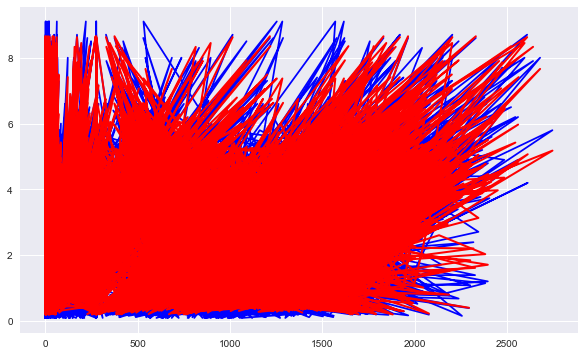

In [22]:
n_alphas = 200
ridge_alphas = np.logspace(-6, 6, n_alphas)
model = RidgeCV(alphas=ridge_alphas,cv=3)
model.fit(X_train,y_train)
print (model.alpha_)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))
# В общем Ridge тоже не дал выдающихся резульатов
#Перейдем к лесу, как более сложный вариант
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 
model= RandomForestRegressor().fit(X_train,y_train)
rf_predict = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, "b")
plt.plot(X_test, rf_predict, "r", lw=2)
print ("Random forest regressor, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));
print (model.score)
print('Variance score: %.2f' % model.score(X_test, y_test))

In [23]:
#Попробуем подобрать параметры леса
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
n_folds = 5
scores = []
fits = []
forest_params = {'n_estimators': [100, 300, 500]}
                 
grid = GridSearchCV(RandomForestRegressor(), forest_params,cv=3,n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, "\n", grid.best_params_, "\n")


D:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.8856613128578629 
 {'n_estimators': 500} 



###  Часть 10. Кривые валидации и обучения

In [24]:
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  )
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size')
    plt.legend()

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name,
                                           cv_param_values, cv=5,
                                                  )
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')
    plt.xlabel(cv_param_name)
    plt.legend()

D:\Python\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


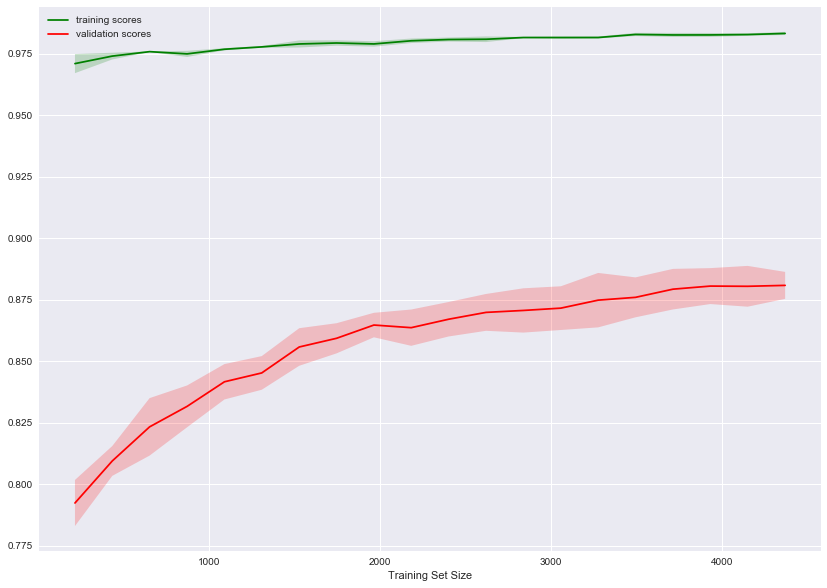

In [25]:
# Кривая обучения
plot_learning_curve(RandomForestRegressor(n_estimators=50,n_jobs=-1),
                   X_train, y_train,  cv=3)
#RandomForestRegressor(scoring=)

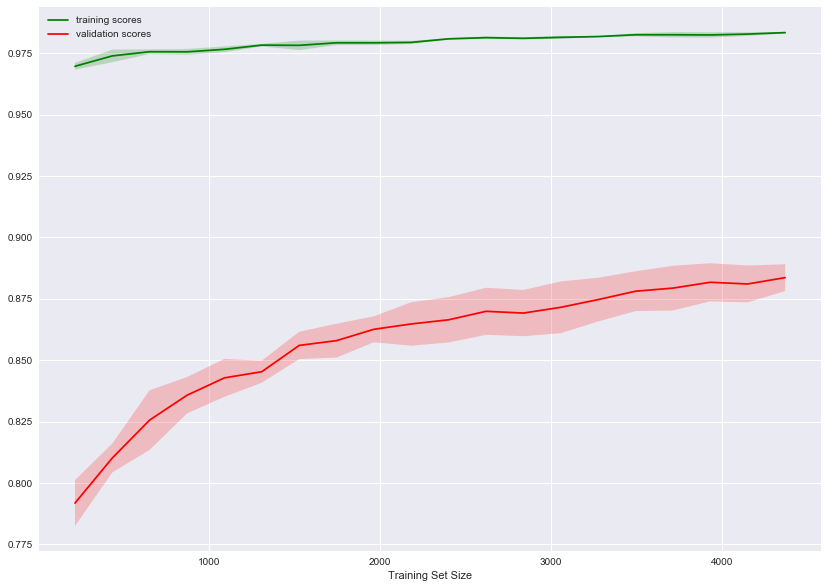

In [26]:
# Кривая обучения масштаб
plot_learning_curve(RandomForestRegressor(n_estimators=50,n_jobs=-1),
                   X_train_s, y_train_s,  cv=3)
#RandomForestRegressor(scoring=)

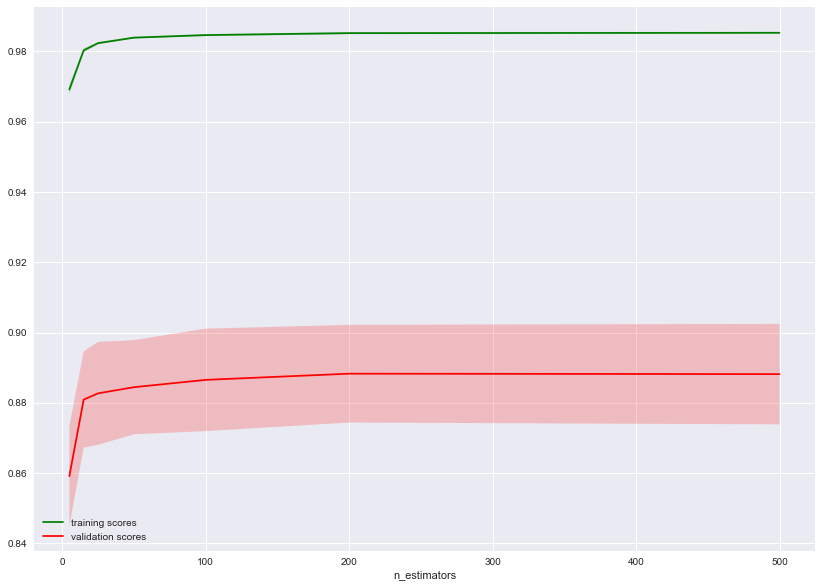

In [27]:
# Кривая валидации
learning_rates = [5,15,25,50,100,200,500]
plot_validation_curve(LogisticRegression(n_estimators=50,n_jobs=-1), X_train, y_train, 
                    cv_param_name='n_estimators', 
                    cv_param_values=learning_rates)


###  Часть 11. Прогноз для тестовой (или отложенной) выборки

In [33]:
%%time
#Исходя из кривых, возьмем 100 деревьв
model= RandomForestRegressor(n_estimators=100,n_jobs=-1).fit(X_train_s,y_train_s)
rf_predict = model.predict(X_test_s)
print ("Random forest regressor, MSE = %.2f" % np.sum((y_test_s - rf_predict) ** 2));
print (model.score)
print('Variance score: %.2f' % model.score(X_test_s, y_test_s))

Random forest regressor, MSE = 567.75
<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>
Variance score: 0.90
Wall time: 1.54 s


###  Часть 12. Оценка модели с описанием выбранной метрики

In [29]:
#Получили результат Variance score: 0.90, что в общем довольно не плохо.Лес как обычно показал приемлемый результат почти из коробки

In [32]:
%%time
#Рали спортивного интереса проверим наши данные на градиентном бустинге
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=17)
gbrt.fit(X_train,y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))
#В общем не сильно выдающийся результат не нанстроеном бустинге, лес значительно лучше.

Правильность на обучающем наборе: 0.894
Правильность на тестовом наборе: 0.862
Wall time: 525 ms


### Часть 13. Выводы 

In [30]:
#В данном проекте не рассматривалась концепция временных рядов, из анализа был удален признак дата.
#Настоявшая модель имеет практическую ценность, что по предсказанию величины загрязнения с одних датчиков 
#(один набор химических соединений), мы предсказываем значение другого датчика (другие химические соединения). 
#Важность в что, что датчики на разные соединения имеют разные цены и разные параметры. 
#В целом идея, что можно использовать более простые датчики и вести предсказания по другим соединения, 
#которые мы не измеряем.
